### Law of Total Probability
<pre>

(A) (B)
P(A or B) = P(A) + P(B) if exclusive

|         = P(A) + P(B) - P(A and B)
(A()B)


P(A and B) = P(A)P(B) if independent
|          = P(A)P(B|A)
|            if independent P(B) = P(B|A)

</pre>

### PMF
$PMF_{binomial}(k;n,p) = {n \choose k} p^k(1-p)^{n-k}$

$k = constant$


$PMF(k)$ -> probability 0-1

### PDF
$PDF_{beta}(p;\alpha,\beta) = Kp^{\alpha-1}(1-p)^{\beta-1}$

this is a conjugate of the PMF binomial

$PDF(p)$ -> NOT a probability, and NOT generally 0-1

it's a probability density, and you integrate it to get a probability mass (which is just a probability)

you can answer questions in ranges (between 20 and 30 years old), but not single points (which makes sense)

In [7]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

import scipy.stats as stats


class Quiz(Suite):
    def Likelihood(self, data, hypo):
        k1, k2, c = data
        n, p1, p2 = hypo
        
        like1 = stats.binom.pmf(k1, n, p1)
        like2 = stats.binom.pmf(k2, n, p2)
        
        
        return like1 * like2


shots = range(0, 10)

import random

def fire_random_weapon():
    prob = random.choice([.4, .3])
    shots = range(0, 10)
    
    hits = [random.random() <= prob for s in shots]
    
    return hits

fire_random_weapon()



[False, False, False, False, False, False, False, False, False, False]

In [8]:
def fire_a_lot():
    attempts = {shot: 0 for shot in range(11)}
    for sample in range(1000):
        as_numbers = 1 * np.array(fire_random_weapon())
        attempts[np.sum(as_numbers)] += 1
        
    return attempts

round1 = fire_a_lot()

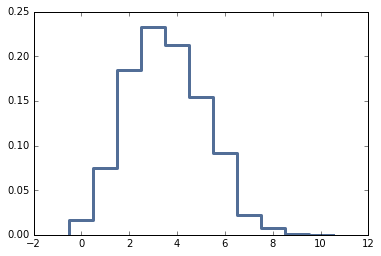

In [9]:
thinkplot.Pmf(Pmf(round1))

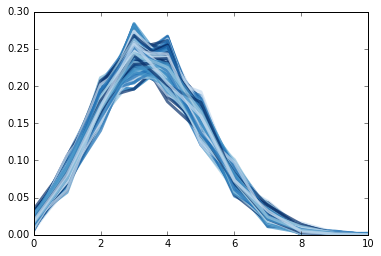

In [10]:
for wow in range(1000):
    thinkplot.Pdf(Pmf(fire_a_lot()))

In [11]:
import scipy.stats as stats

In [12]:
(stats.binom.pmf(3,10,.3) + stats.binom.pmf(3,10,.4)) / 2

0.24090939000000014